## Rotation

In [210]:
# Importing
import os
import glob
import sys
sys.path.append(os.path.join(".."))

import cv2
import numpy as np 

# display utils
from utils.imutils import jimshow 
import matplotlib.pyplot as plt
import matplotlib as mpl

## Load image

In [1]:
image = cv2.imread(os.path.join("..", "data", "Pokemon_Images", "red_and_blue.png"))

NameError: name 'cv2' is not defined

In [106]:
image.shape

(211, 474, 3)

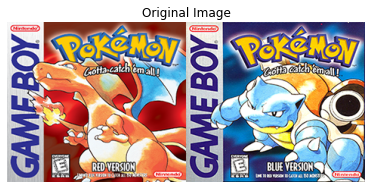

In [107]:
jimshow(image, "Original Image")

## Challenge 1: Where is the center?

In [170]:
height = image.shape[0]
width = image.shape[1]


In [191]:
center = width//2, height//2

## Rotation matrix, using opencv (cv2)

211

In [192]:
M = cv2.getRotationMatrix2D(center, 45, 1)

In [193]:
rotated = cv2.warpAffine(image, M, (width,height))

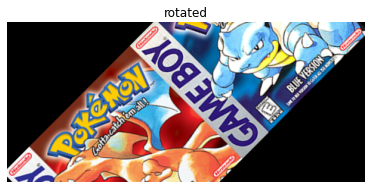

In [194]:
jimshow(rotated, "rotated")

In [203]:
def imrotate(img, degrees_rotation, scale = 1):
    (height, width) = image.shape[:2]
    
    center = (height // 2, width // 2)
    
    M = cv2.getRotationMatrix2D(center, degrees_rotation, scale)
    
    rotated_image = cv2.warpAffine(img, M, (width, height))
    
    jimshow(rotated_image, "rotated")


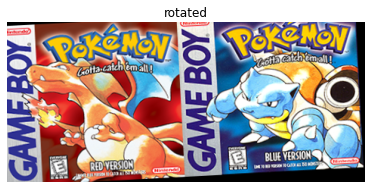

In [204]:
imrotate(image, 3, 1)

## Splitting channels

In [205]:
blue, green, red = cv2.split(image) # remember they are reversed

In [206]:
blue

array([[244, 247, 248, ...,  99, 117, 104],
       [246, 246, 248, ...,  87,  92, 110],
       [246, 249, 249, ...,  89,  98, 120],
       ...,
       [192, 182, 179, ..., 240, 255, 174],
       [190, 188, 181, ..., 243, 254, 202],
       [194, 188, 182, ..., 177, 186, 158]], dtype=uint8)

In [208]:
from utils.imutils import jimshow_channel

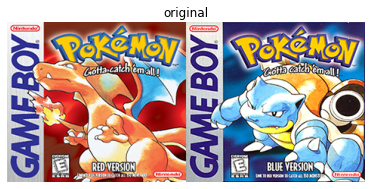

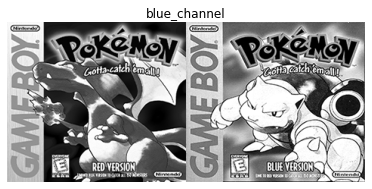

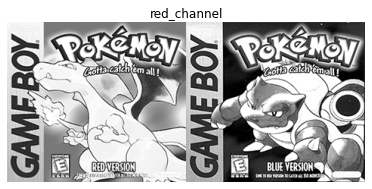

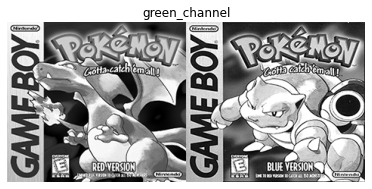

(None, None, None, None)

In [160]:
jimshow(image, "original"), jimshow_channel(blue, "blue_channel"), jimshow_channel(red, "red_channel"), jimshow_channel(green, "green_channel")

## Define empty numpy array, to see specific color channels

In [120]:
shape_of_image = image.shape[:2]

In [121]:
empty_array = np.zeros(shape_of_image, dtype = "uint8")

In [122]:
empty_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

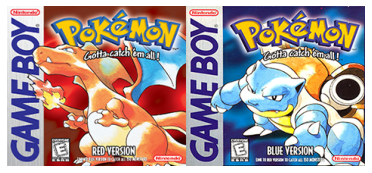

In [123]:
jimshow(cv2.merge([blue, green, red]))

In [124]:
blue_channel = cv2.merge([blue, empty_array, empty_array])

In [125]:
green_channel = cv2.merge([empty_array, green, empty_array])

In [126]:
red_channel = cv2.merge([empty_array, empty_array, red])

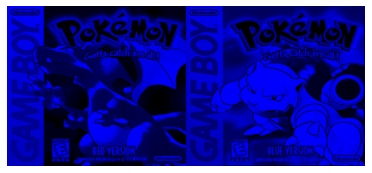

In [127]:
jimshow(blue_channel)

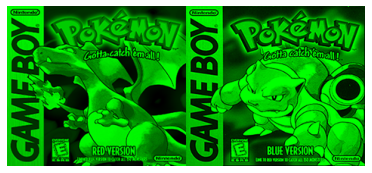

In [128]:
jimshow(green_channel)


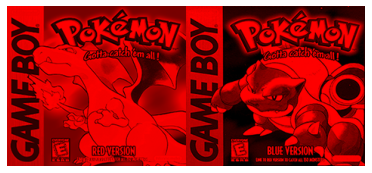

In [129]:
jimshow(red_channel)


## Making a greyscale histogram of an image 

In [130]:
# create a figure
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [131]:
plt.hist(array, bins = 256, range = [0, 256]) # array = array of interest, bins = number of bins, range - range of possible numbers

NameError: name 'array' is not defined

In [132]:
# Flatten makes multidimensional data into a 1 dimension vector. This also merges the colors
grey_image = image.flatten()

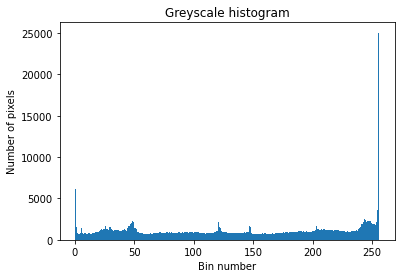

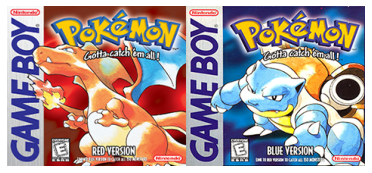

In [134]:
plt.figure()
plt.hist(grey_image, 256, [0,256])
plt.title("Greyscale histogram")
plt.xlabel("Bin number")
plt.ylabel("Number of pixels")
plt.show()
jimshow(image)

# Small assignment. Make a function that plots greyscale, and iterate over a folder

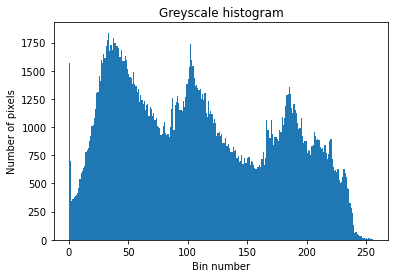

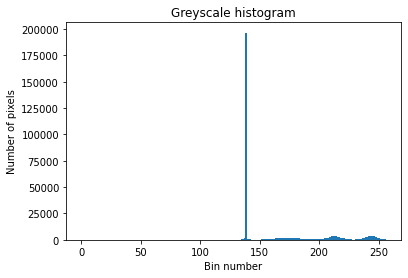

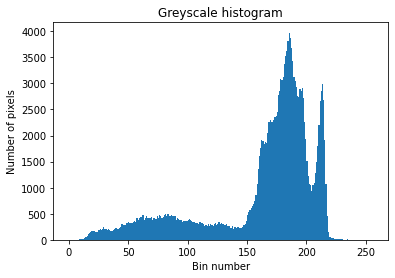

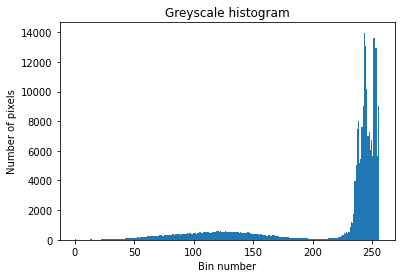

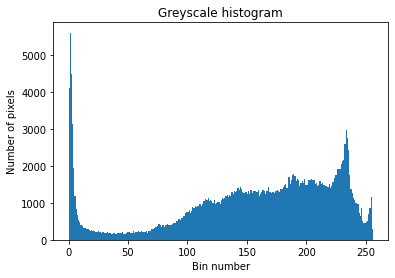

In [219]:
filepath = os.path.join("..", "data", "img", '*.png')

for file in glob.glob(filepath):
    img = cv2.imread(file)
    grey_image = img.flatten()
    plt.figure()
    plt.hist(grey_image, 256, [0,256])
    plt.title("Greyscale histogram")
    plt.xlabel("Bin number")
    plt.ylabel("Number of pixels")
    plt.show()
